<a href="https://colab.research.google.com/github/AAhmadS/convex_opt/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

So basically the algorithm is built-up on QR decomposition of a matrix;<br/>if matrix **A** decomposes to **QR** in which Q is an orthonormal matrix(a basis of the space) and R is uppertriangular; then the estimators of **A** is created by the below method:<br/>
A_i+1= R_i Q_i = inv(Q_i) Q_i R_i Q_i = Qᵀ_i A_i Q_i
<br/>by doing so, estimators converge to a triangular matrix, also being the Shur form of A, in which the eigenvalues lay on the diagonal.


In [42]:
import pprint
import scipy
import scipy.linalg
import random
import numpy as np

parameter = 2000
A = np.random.rand(4,4)
print("A:",A,"\n","-"*100)
def QRAlgo(A, parameter):
  matrix = A.copy()
  for i in range(parameter):
    if (i%500 == 0):
      print(f"step:{i}\n matrix : {matrix}\n eigenvalues : {list(np.diagonal(matrix))}\n","-"*100)

    Q, R = A = scipy.linalg.qr(matrix)
    matrix = R @ Q

  return matrix


QRAlgo(A,parameter)

A: [[0.90174152 0.72583866 0.16136844 0.34656592]
 [0.76728863 0.56074962 0.92550896 0.85183779]
 [0.01444841 0.51454871 0.90789128 0.72600754]
 [0.64409234 0.06820347 0.34664821 0.2004486 ]] 
 ----------------------------------------------------------------------------------------------------
step:0
 matrix : [[0.90174152 0.72583866 0.16136844 0.34656592]
 [0.76728863 0.56074962 0.92550896 0.85183779]
 [0.01444841 0.51454871 0.90789128 0.72600754]
 [0.64409234 0.06820347 0.34664821 0.2004486 ]]
 eigenvalues : [0.9017415167002166, 0.5607496192586507, 0.9078912822913566, 0.20044859972234896]
 ----------------------------------------------------------------------------------------------------
step:500
 matrix : [[ 2.14215306e+000 -1.45436801e-002 -7.19624983e-001 -1.06775082e-001]
 [ 3.90765781e-235  7.26944568e-001 -3.90867895e-001 -4.18353313e-001]
 [ 0.00000000e+000  2.01780532e-284 -3.18594581e-002 -8.96468166e-002]
 [ 0.00000000e+000 -1.13630841e-284  3.36311387e-001 -2.66407156e-00

array([[ 2.14215306,  0.01454368,  0.50826067, -0.52051141],
       [ 0.        ,  0.72694457, -0.56805032,  0.07152653],
       [ 0.        ,  0.        , -0.06871494, -0.36296875],
       [ 0.        ,  0.        ,  0.06298945, -0.22955167]])

#Problem 2

PSNR formula is descreibed as follows:

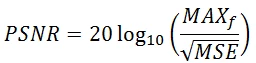
<br/>**so basically we seek to maximaize the equation**<br/>
term MSE is :

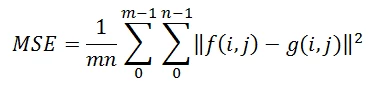


and for other terms:<br/>
>**f** represents the matrix data of our original image<br/>
>**g** represents the matrix data of our degraded image in question<br/>
>**m** represents the numbers of rows of pixels of the images and i represents the index of that row<br/>
>**n** represents the number of columns of pixels of the image and j represents the index of that column<br/>
>**MAXf** is the maximum signal value that exists in our original “known to be good” image

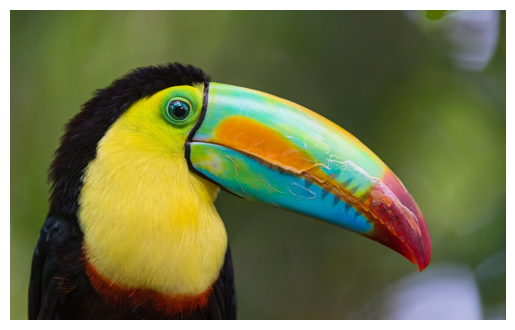

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('q2_pic.jpg')

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(1800, 2880, 3)
(1800, 2880)


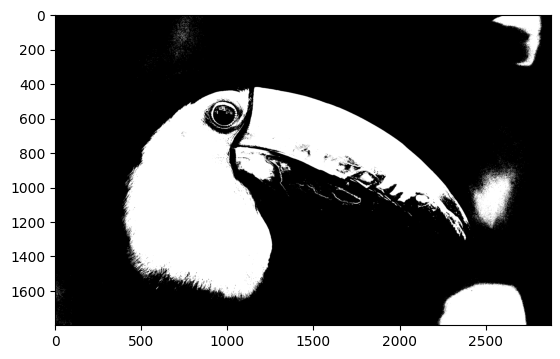

In [46]:
print(img.shape)
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(thresh, img_bw) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

print(img_bw.shape)

plt.imshow(img_bw,cmap="gray")
plt.show()

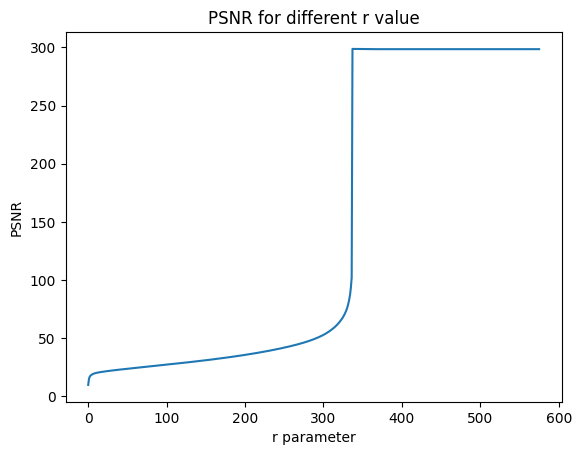

In [87]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 10000
    max_pixel = np.max(original)
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def Image_SVD(U,S,Vh,r):
  U_t , S_t, Vh_t = U[:,:r] , S[:r,:],Vh
  img_t = U_t @ S_t @ Vh_t
  return img_t


psnr = []
U, S, Vh = np.linalg.svd(img_bw, full_matrices=False)
S = np.diag(S)
for r in np.arange(1,img_bw.shape[1],step = 5):
  psnr.append(PSNR(img_bw,Image_SVD(U, S, Vh,r)))

plt.title("PSNR for different r value")
plt.plot(psnr)
plt.xlabel("r parameter")
plt.ylabel("PSNR")
plt.show()

multiply x labels by5

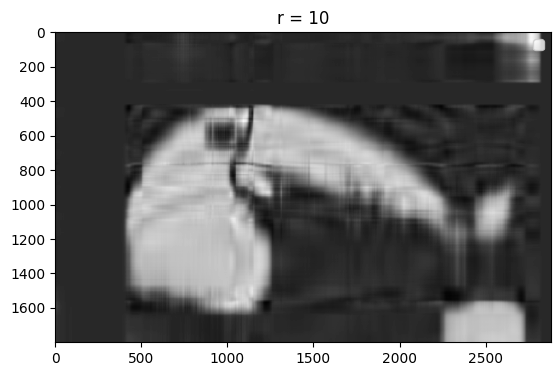

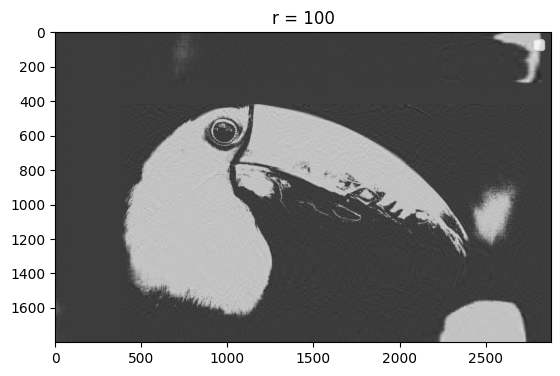

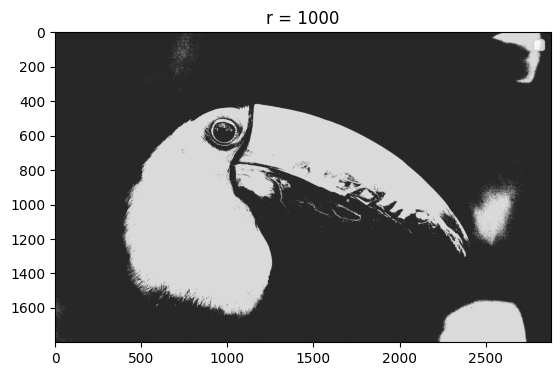

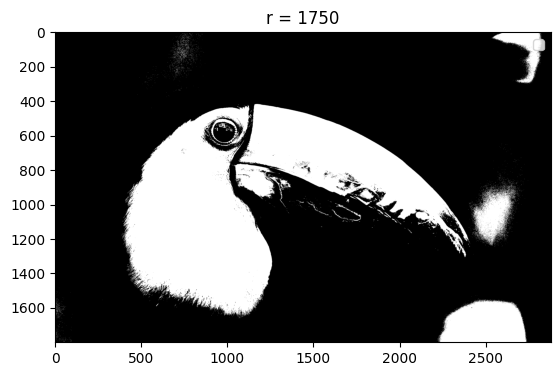

In [89]:
for r in (10,100,1000,1750):
  img_t = Image_SVD(U, S, Vh,r)
  plt.imshow(img_t,cmap="gray")
  plt.title(f"r = {r}")
  plt.legend()
  plt.show()

In [107]:
def r_PSNR(image, goal, step = 5):
  psnr = []
  U, S, Vh = np.linalg.svd(goal, full_matrices=False)
  S = np.diag(S)
  for r in np.arange(1,goal.shape[1],step = step):
    psnr.append(PSNR(image,Image_SVD(U, S, Vh,r)))

  return psnr

In [148]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.5
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy

   elif noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.5
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

In [149]:
ga_img = noisy("gauss",img_bw)
sp_img = noisy("s&p",img_bw)

print("psnr of image with gaussian noise : ",PSNR(img_bw,ga_img),"\n","-"*100)
print("psnr of image with salt and pepper noise :",PSNR(img_bw,sp_img))

psnr of image with gaussian noise :  51.138877544846615 
 ----------------------------------------------------------------------------------------------------
psnr of image with salt and pepper noise : 52.664605922884846


<ipython-input-148-967da3821a53>:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-148-967da3821a53>:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


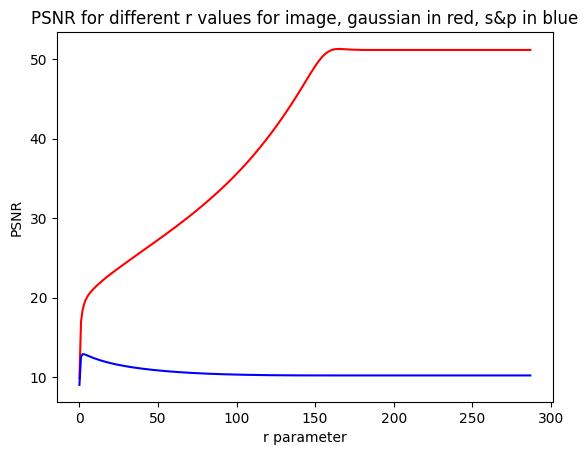

In [125]:
ga_psnr = r_PSNR(img_bw, ga_img, step = 10)
sp_psnr = r_PSNR(img_bw, sp_img, step = 10)


plt.title("PSNR for different r values for image, gaussian in red, s&p in blue")
plt.plot(ga_psnr,"r")
plt.plot(sp_psnr,'b')
plt.xlabel("r parameter")
plt.ylabel("PSNR")
plt.show()

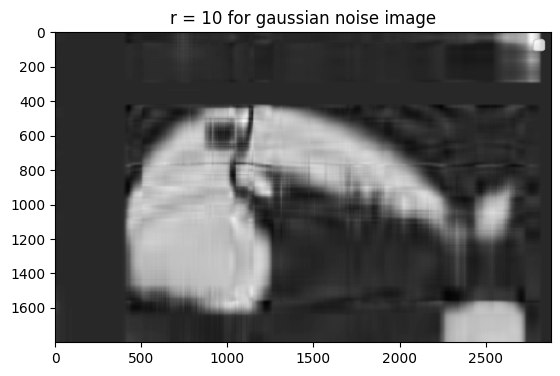

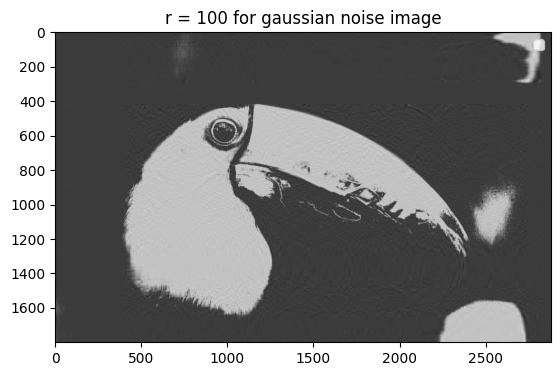

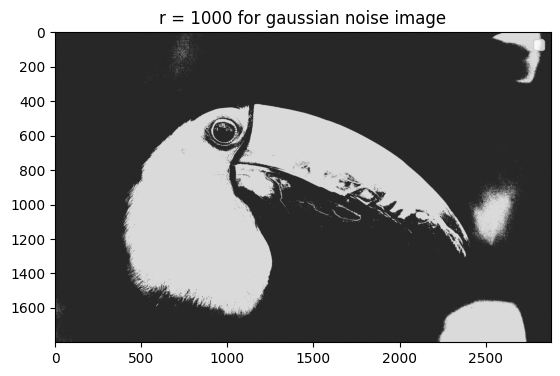

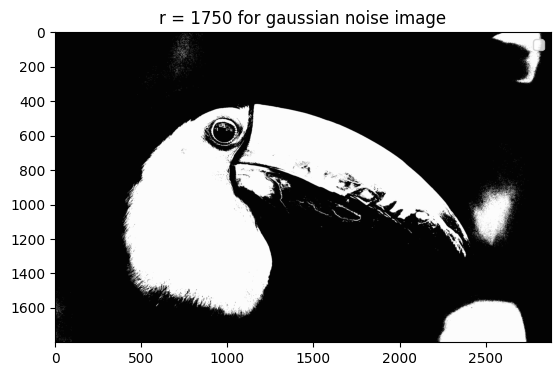

In [126]:
U, S, Vh = np.linalg.svd(ga_img, full_matrices=False)
S = np.diag(S)
for r in (10,100,1000,1750):
  img_t = Image_SVD(U, S, Vh,r)
  plt.imshow(img_t,cmap="gray")
  plt.title(f"r = {r} for gaussian noise image")
  plt.legend()
  plt.show()

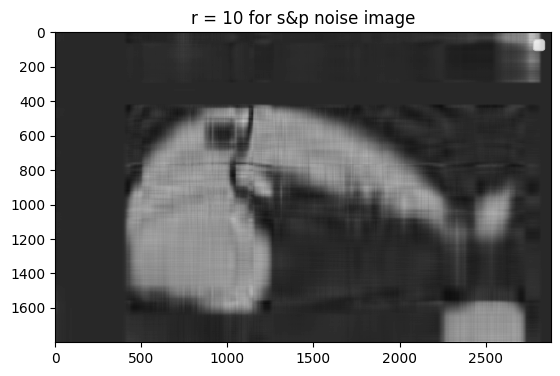

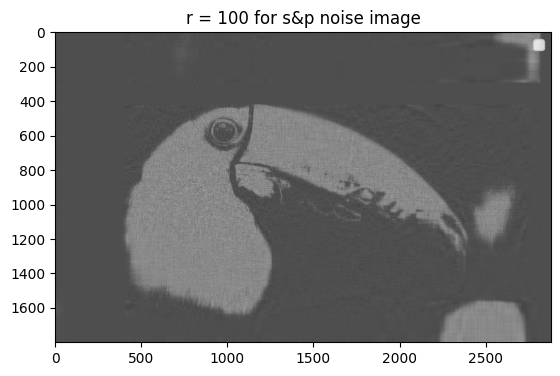

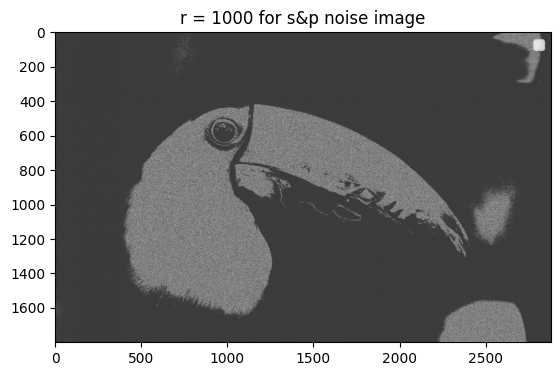

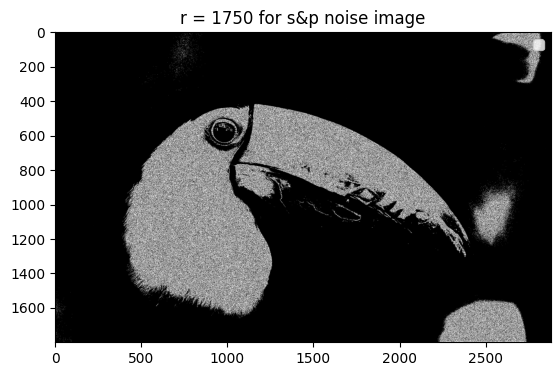

In [127]:
U, S, Vh = np.linalg.svd(sp_img, full_matrices=False)
S = np.diag(S)
for r in (10,100,1000,1750):
  img_t = Image_SVD(U, S, Vh,r)
  plt.imshow(img_t,cmap="gray")
  plt.title(f"r = {r} for s&p noise image")
  plt.legend()
  plt.show()

although the plots, look fishy, but the method could choose some r for the image with s&p noise with regards to psnr evaluation.

#Problem 3

In [2]:
import pprint
import scipy
import scipy.linalg
import random
import numpy as np
import pandas as pd

1,2-<br/>
covariance matrix of matrix **X** is defined as :
image.png

So covariance of X ̃is what we're looking for. So each component of SVD decomposition, related to this matrix, would represent column and row space and also related eigenvectors, which in this case linked with eigenvalues, each indicating an orthogonal variantial reducing factor.

3-<br/>
choosing first l columns of U, is similar to selecting l most variance reducing eigenvectors. applying the matrix to our original data, each data point will be mapped to it's corresponding point in the Uₗ-basis, since Uₗ is a basis map, itself.


In [45]:
data = pd.read_csv('iris.csv')

In [46]:
data["name"] = data["Unnamed: 5"]
data.drop(columns = {"sepal_length","Unnamed: 5"},inplace=True)

In [179]:
def PCA(data , l):
  data_mean = data.mean(axis = 1)
  data_tild = data.copy()
  for x in data.columns:
    data_tild[x] = data_tild[x] - data_mean
  C = data_tild.T @ data_tild
  U, S, Vh = np.linalg.svd(C.to_numpy(), full_matrices=False)

  U_t = U[:,:l]
  return pd.DataFrame(data.to_numpy() @ U_t)

In [180]:
new_data = PCA(data.drop(columns = {"name"}), 2)
new_data["name"] = data["name"]

In [181]:
new_data.columns = ["pc1","pc2","name"]

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

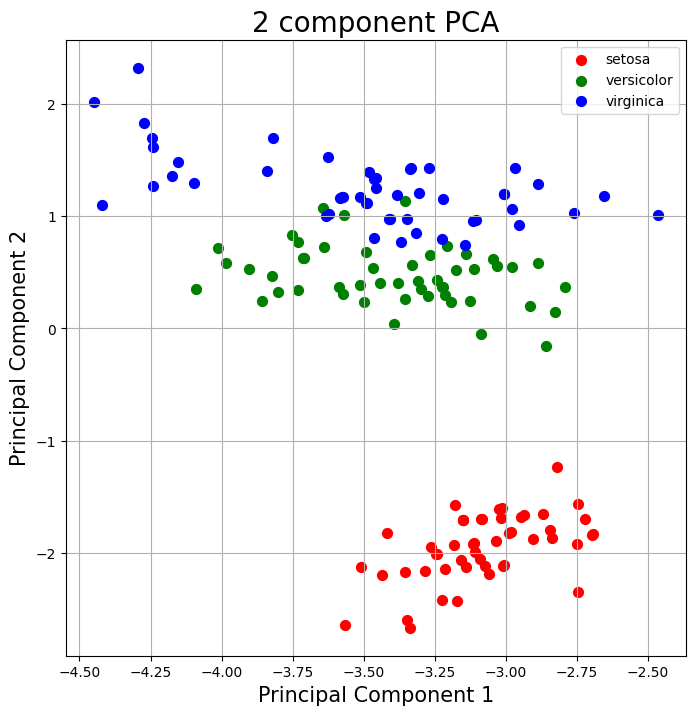

In [183]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

names = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for name, color in zip(names, colors):
    indicesToKeep = new_data['name'] == name
    ax.scatter(new_data.loc[indicesToKeep, 'pc1']
               , new_data.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(names)
ax.grid()

Sadly, it doesn't match the way theory explains, since residuals on the first component are all negative, which is extremely unexpected considering the fact that this component reduces the most variance from the data.